In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
#Read data
df_raw = px.data.gapminder().query("year == 2007")
df_raw = df_raw.reset_index(inplace = False)
df_raw.head()

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
1,23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
2,35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
3,47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
4,59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


It is interesting to know what kind of clusters countries of the world form in terms of life expentancy, pop & GDP

In [3]:
#Select the data
df = df_raw[['lifeExp','pop','gdpPercap']]
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

#Go back to pandas dataframe
df_sc = pd.DataFrame(data = df_sc, columns = df.columns)

In [4]:
#How many clusters?
#Let's examine that
squares =  []
for i in range(1,31):  #Define the range for number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50, n_init = 'auto')
    kmeans.fit(df_sc)
    squares.append(kmeans.inertia_) #Square distance sum

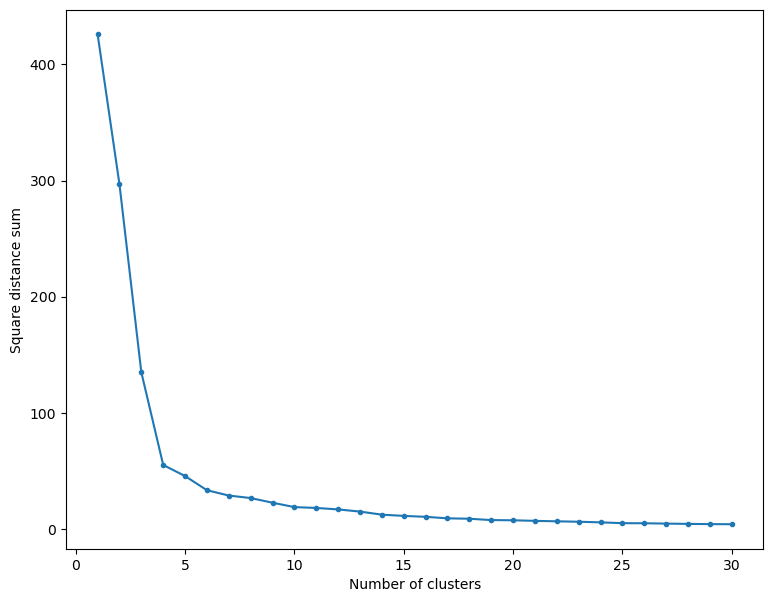

In [5]:
plt.figure(figsize = (9,7))
plt.plot(range(1,31), squares, marker = '.')
plt.xlabel('Number of clusters')
plt.ylabel('Square distance sum')
plt.show()

In [6]:
#Four clusters seems to be a good choice
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 50,n_init = 'auto')
kmeans.fit(df_sc)

KMeans(n_clusters=4, random_state=50)

In [7]:
#Scale back to human readable data and add country to the data frame

df_iscaled =  scaler.inverse_transform(df_sc)

df_res = pd.DataFrame(data = df_iscaled, columns = ['lifeExp','pop','gdpPercap'])
df_res['Labels'] = kmeans.labels_
df_res['country'] = df_raw['country']
df_res.head(10)

,lifeExp,pop,gdpPercap,Labels,country
0,43.828,31889923.0,974.580338,2,Afghanistan
1,76.423,3600523.0,5937.029526,3,Albania
2,72.301,33333216.0,6223.367465,3,Algeria
3,42.731,12420476.0,4797.231267,2,Angola
4,75.320,40301927.0,12779.379640,3,Argentina
5,81.235,20434176.0,34435.367440,0,Australia
6,79.829,8199783.0,36126.492700,0,Austria
7,75.635,708573.0,29796.048340,0,Bahrain
8,64.062,150448339.0,1391.253792,3,Bangladesh
9,79.441,10392226.0,33692.605080,0,Belgium


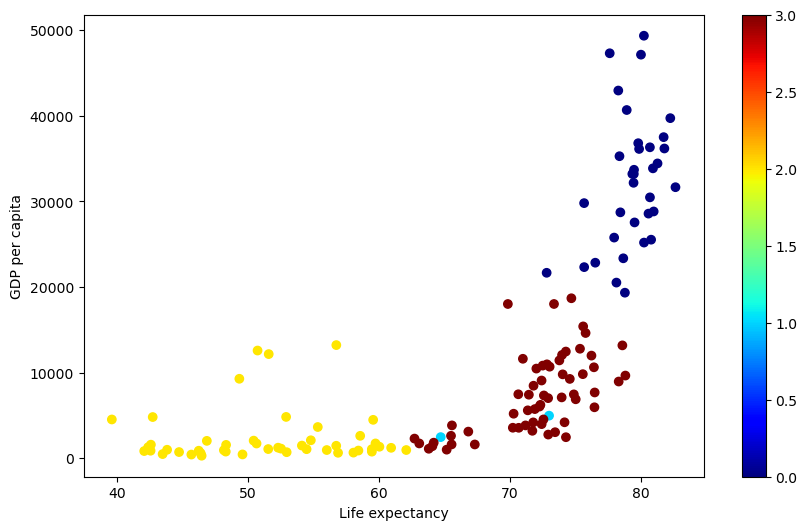

In [8]:
#Visualize clusters, lifeexp vs. gdp
plt.figure(figsize = (10,6))
plt.scatter(df_res['lifeExp'],df_res['gdpPercap'], c = df_res['Labels'], cmap = 'jet')
plt.ylabel('GDP per capita')
plt.colorbar()
plt.xlabel('Life expectancy')
plt.show()

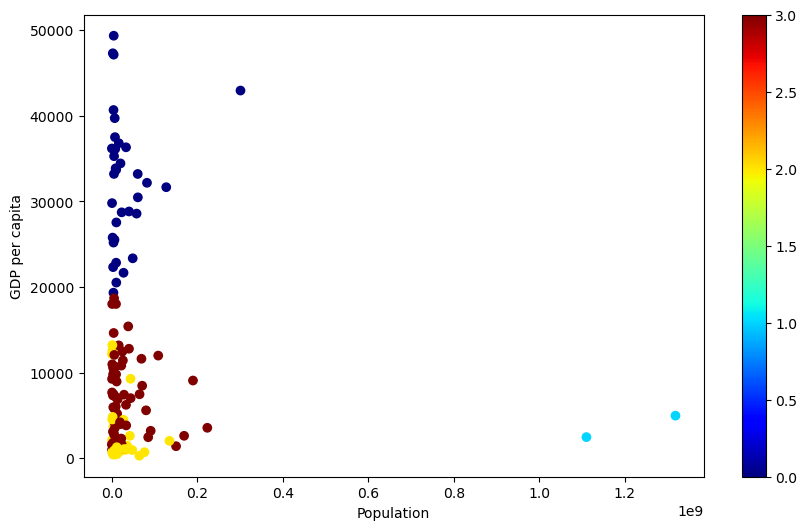

In [9]:
#Visualize clusters, population vs. gdp
plt.figure(figsize = (10,6))
plt.scatter(df_res['pop'],df_res['gdpPercap'], c = df_res['Labels'], cmap = 'jet')
plt.ylabel('GDP per capita')
plt.colorbar()
plt.xlabel('Population')
plt.show()

In [10]:
#Check cluster 1
n=0
print('Mean values of cluster 1:')
print(np.round(df_res[df_res['Labels'] == n][['lifeExp','pop','gdpPercap']].mean()))
df_res[df_res['Labels'] == n].head()

Mean values of cluster 1:
lifeExp            79.0
pop          30077289.0
gdpPercap       32293.0
dtype: float64


,lifeExp,pop,gdpPercap,Labels,country
5,81.235,20434176.0,34435.36744,0,Australia
6,79.829,8199783.0,36126.49270,0,Austria
7,75.635,708573.0,29796.04834,0,Bahrain
9,79.441,10392226.0,33692.60508,0,Belgium
20,80.653,33390141.0,36319.23501,0,Canada


In [11]:
#Check cluster 2
n=1
print('Mean values of cluster', n+1)
print(np.round(df_res[df_res['Labels'] == n][['lifeExp','pop','gdpPercap']].mean()))
df_res[df_res['Labels'] == n].head()

Mean values of cluster 2
lifeExp      6.900000e+01
pop          1.214540e+09
gdpPercap    3.706000e+03
dtype: float64


,lifeExp,pop,gdpPercap,Labels,country
24,72.961,1.318683e+09,4959.114854,1,China
58,64.698,1.110396e+09,2452.210407,1,India


In [12]:
#Check cluster 3
n=2
print('Mean values of cluster', n+1)
print(np.round(df_res[df_res['Labels'] == n][['lifeExp','pop','gdpPercap']].mean()))
df_res[df_res['Labels'] == n].head()

Mean values of cluster 3
lifeExp            51.0
pop          19068714.0
gdpPercap        2401.0
dtype: float64


,lifeExp,pop,gdpPercap,Labels,country
0,43.828,31889923.0,974.580338,2,Afghanistan
3,42.731,12420476.0,4797.231267,2,Angola
10,56.728,8078314.0,1441.284873,2,Benin
13,50.728,1639131.0,12569.851770,2,Botswana
16,52.295,14326203.0,1217.032994,2,Burkina Faso


In [13]:
#Check cluster 4
n=3
print('Mean values of cluster', n+1)
print(np.round(df_res[df_res['Labels'] == n][['lifeExp','pop','gdpPercap']].mean()))
df_res[df_res['Labels'] == n].head()

Mean values of cluster 4
lifeExp            72.0
pop          32035752.0
gdpPercap        7379.0
dtype: float64


,lifeExp,pop,gdpPercap,Labels,country
1,76.423,3600523.0,5937.029526,3,Albania
2,72.301,33333216.0,6223.367465,3,Algeria
4,75.320,40301927.0,12779.379640,3,Argentina
8,64.062,150448339.0,1391.253792,3,Bangladesh
11,65.554,9119152.0,3822.137084,3,Bolivia
